<a href="https://colab.research.google.com/github/BrunoDkno368/An-lisis-de-Vuelos-en-Argentina-ANAC-/blob/main/Analisis_de_vuelo_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#ETL

##EXTRAT (E)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ETL practica/Aterrizaje/despegue y aterrizaje.csv', sep=';')
df.head()

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad dato
0,01/01/2025,0:00,Regular,Doméstico,Aterrizaje,BAR,EZE,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8Q8,167,84,DEFINITIVO
1,01/01/2025,0:03,Regular,Internacional,Despegue,EZE,KATL,DELTA AIRLINES,0,281,281,DEFINITIVO
2,01/01/2025,0:06,Regular,Doméstico,Aterrizaje,SAL,NEU,JETSMART AIRLINES S.A.,AIB-A320-232,174,87,DEFINITIVO
3,01/01/2025,0:07,Regular,Doméstico,Aterrizaje,CBA,BAR,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8U3,83,42,DEFINITIVO
4,01/01/2025,0:07,Regular,Internacional,Despegue,AER,SCEL,LATAM AIRLINES GROUP S.A.(exLAN AIRLINE),0,162,162,DEFINITIVO


##TRANSFORM (T)

### CANTIDAD DE REGISTROS

In [3]:
print('Registros:', len(df) )

Registros: 393007


### INFORMACION DEL DF

In [4]:
print('El resumen de los datos es: ',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393007 entries, 0 to 393006
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Fecha UTC                          393007 non-null  object
 1   Hora UTC                           393007 non-null  object
 2   Clase de Vuelo (todos los vuelos)  393007 non-null  object
 3   Clasificación Vuelo                393007 non-null  object
 4   Tipo de Movimiento                 393007 non-null  object
 5   Aeropuerto                         393007 non-null  object
 6   Origen / Destino                   393007 non-null  object
 7   Aerolinea Nombre                   393007 non-null  object
 8   Aeronave                           393007 non-null  object
 9   Pasajeros                          393007 non-null  int64 
 10  PAX                                393007 non-null  int64 
 11  Calidad dato                       393007 non-null  

In [5]:
print ('La cantidad de nulos que posee el df es :',df.isnull().sum())

La cantidad de nulos que posee el df es : Fecha UTC                            0
Hora UTC                             0
Clase de Vuelo (todos los vuelos)    0
Clasificación Vuelo                  0
Tipo de Movimiento                   0
Aeropuerto                           0
Origen / Destino                     0
Aerolinea Nombre                     0
Aeronave                             0
Pasajeros                            0
PAX                                  0
Calidad dato                         0
dtype: int64


In [6]:
df.isnull().sum()

,0
Fecha UTC,0
Hora UTC,0
Clase de Vuelo (todos los vuelos),0
Clasificación Vuelo,0
Tipo de Movimiento,0
Aeropuerto,0
Origen / Destino,0
Aerolinea Nombre,0
Aeronave,0
Pasajeros,0


### CREAMOS UNA COLUMNA PARA EL DIA Y EL HORARIO UTC

In [7]:
df['Fecha_UTC'] = pd.to_datetime(df['Fecha UTC'], errors= 'coerce')
df['Hora_UTC'] = pd.to_timedelta(df['Hora UTC'] + ':00', errors= 'coerce')
df['Datetime'] = df['Fecha_UTC'] + df['Hora_UTC']

In [8]:
df.head()

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad dato,Fecha_UTC,Hora_UTC,Datetime
0,01/01/2025,0:00,Regular,Doméstico,Aterrizaje,BAR,EZE,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8Q8,167,84,DEFINITIVO,2025-01-01,0 days 00:00:00,2025-01-01 00:00:00
1,01/01/2025,0:03,Regular,Internacional,Despegue,EZE,KATL,DELTA AIRLINES,0,281,281,DEFINITIVO,2025-01-01,0 days 00:03:00,2025-01-01 00:03:00
2,01/01/2025,0:06,Regular,Doméstico,Aterrizaje,SAL,NEU,JETSMART AIRLINES S.A.,AIB-A320-232,174,87,DEFINITIVO,2025-01-01,0 days 00:06:00,2025-01-01 00:06:00
3,01/01/2025,0:07,Regular,Doméstico,Aterrizaje,CBA,BAR,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8U3,83,42,DEFINITIVO,2025-01-01,0 days 00:07:00,2025-01-01 00:07:00
4,01/01/2025,0:07,Regular,Internacional,Despegue,AER,SCEL,LATAM AIRLINES GROUP S.A.(exLAN AIRLINE),0,162,162,DEFINITIVO,2025-01-01,0 days 00:07:00,2025-01-01 00:07:00


### CONVERTIMO FECHA Y HORA (UTM) A FECHA Y HORA (GMT)

In [9]:
df['datetime_local'] = df['Datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Buenos_Aires')


In [10]:
df.sample(3)


,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad dato,Fecha_UTC,Hora_UTC,Datetime,datetime_local
204800,06/05/2025,16:05,Regular,Internacional,Despegue,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,348,348,DEFINITIVO,2025-06-05,0 days 16:05:00,2025-06-05 16:05:00,2025-06-05 13:05:00-03:00
14570,10/01/2025,16:28,Regular,Internacional,Despegue,EZE,LEBL,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,279,279,DEFINITIVO,2025-10-01,0 days 16:28:00,2025-10-01 16:28:00,2025-10-01 13:28:00-03:00
319229,19/07/2025,10:23,Vuelo Privado con Matrícula Nacional,Doméstico,Aterrizaje,DOZ,AER,BAIRES FLY SA,LJ-35,4,2,PROVISORIO,NaT,0 days 10:23:00,NaT,NaT


In [11]:
print('La cantidad de registros que tiene es:', len(df))

La cantidad de registros que tiene es: 393007


In [12]:
print('La cantidad de nulos que tenemos es :', df.isna().sum())

La cantidad de nulos que tenemos es : Fecha UTC                                 0
Hora UTC                                  0
Clase de Vuelo (todos los vuelos)         0
Clasificación Vuelo                       0
Tipo de Movimiento                        0
Aeropuerto                                0
Origen / Destino                          0
Aerolinea Nombre                          0
Aeronave                                  0
Pasajeros                                 0
PAX                                       0
Calidad dato                              0
Fecha_UTC                            239803
Hora_UTC                                  0
Datetime                             239803
datetime_local                       239803
dtype: int64


In [13]:
df = df.dropna(subset=['datetime_local', 'Tipo de Movimiento'])


In [14]:
print('La cantidad de nulos que tenemos es :', df.isna().sum())

La cantidad de nulos que tenemos es : Fecha UTC                            0
Hora UTC                             0
Clase de Vuelo (todos los vuelos)    0
Clasificación Vuelo                  0
Tipo de Movimiento                   0
Aeropuerto                           0
Origen / Destino                     0
Aerolinea Nombre                     0
Aeronave                             0
Pasajeros                            0
PAX                                  0
Calidad dato                         0
Fecha_UTC                            0
Hora_UTC                             0
Datetime                             0
datetime_local                       0
dtype: int64


In [15]:
print('La cantidad de registros que tiene es:', len(df))

La cantidad de registros que tiene es: 153204


###NORMALIZAR COLUMNAS

In [16]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

##LOAD (L)

In [17]:
df.to_csv('archivo_limpio.csv', index=False)

#EDA

##RESUMEN DESCRIPTIVO

In [18]:
df.describe()

,pasajeros,pax,fecha_utc,hora_utc,datetime
count,153204.000000,153204.000000,153204,153204,153204
mean,84.961444,56.078660,2025-06-21 18:32:42.559724032,0 days 14:34:43.035560429,2025-06-22 09:07:25.595284992
min,0.000000,0.000000,2025-01-01 00:00:00,0 days 00:00:00,2025-01-01 00:00:00
25%,0.000000,0.000000,2025-04-01 00:00:00,0 days 11:35:00,2025-04-01 15:25:00
50%,87.000000,45.000000,2025-07-01 00:00:00,0 days 15:27:00,2025-07-01 13:29:30
75%,152.000000,83.000000,2025-10-01 00:00:00,0 days 19:20:00,2025-10-01 14:04:15
max,364.000000,364.000000,2025-12-08 00:00:00,0 days 23:59:00,2025-12-08 23:59:00
std,78.142143,63.326046,NaN,0 days 06:07:34.468859519,NaN


##MOVIMIENTO POR TIPO

In [19]:
df['tipo_de_movimiento'].value_counts(normalize=True) * 100


,proportion
tipo_de_movimiento,
Despegue,50.272839
Aterrizaje,49.727161


##TOP AEROPUERTO/ AEROLINEA

In [20]:
Top_aeropuerto = df['aeropuerto'].value_counts().head(5)
Top_aerolineas = df['aerolinea_nombre'].value_counts().head(5)

In [21]:
print('El top 5 de aeropuetos es:', Top_aeropuerto)
print('El top 5 de aerolineas es:', Top_aerolineas)

El top 5 de aeropuetos es: aeropuerto
AER    36903
EZE    19527
MOR    14927
FDO    10028
CBA     7336
Name: count, dtype: int64
El top 5 de aerolineas es: aerolinea_nombre
AEROLINEAS ARGENTINAS SA       51741
0                              50516
JETSMART AIRLINES S.A.         12667
FB LÍNEAS AÉREAS - FLYBONDI    11515
GOL LINHAS AÉREAS S.A.          3047
Name: count, dtype: int64


In [23]:
#Observamos que en nombre de aerolinea posee un 0, esto puede ser un error de carga, vuelos de entrenamiento, militares o sanitarios, pasamos a cambiarle el nombre como desconocido para poder tener una observacion mas clara

df['aerolinea_nombre'] = df['aerolinea_nombre'].replace(['0',0,'', None], 'Desconocido')

In [25]:
Top_aerolineas = df['aerolinea_nombre'].value_counts().head(5)
print('El top 5 de aerolineas es:', Top_aerolineas)

El top 5 de aerolineas es: aerolinea_nombre
AEROLINEAS ARGENTINAS SA       51741
Desconocido                    50516
JETSMART AIRLINES S.A.         12667
FB LÍNEAS AÉREAS - FLYBONDI    11515
GOL LINHAS AÉREAS S.A.          3047
Name: count, dtype: int64


##TRAFICO DIARIO

In [28]:
df['fecha'] = df['datetime_local'].dt.date
mov_dia = df.groupby('fecha')['tipo_de_movimiento'].count().reset_index()
mov_dia.columns = ['fecha', 'movimientos']
mov_dia.head()


,fecha,movimientos
0,2024-12-31,64
1,2025-01-01,961
2,2025-01-02,1779
3,2025-01-03,1626
4,2025-01-04,1639


# VISUALIZACIONES

### MOVIMIENTO DIARIO

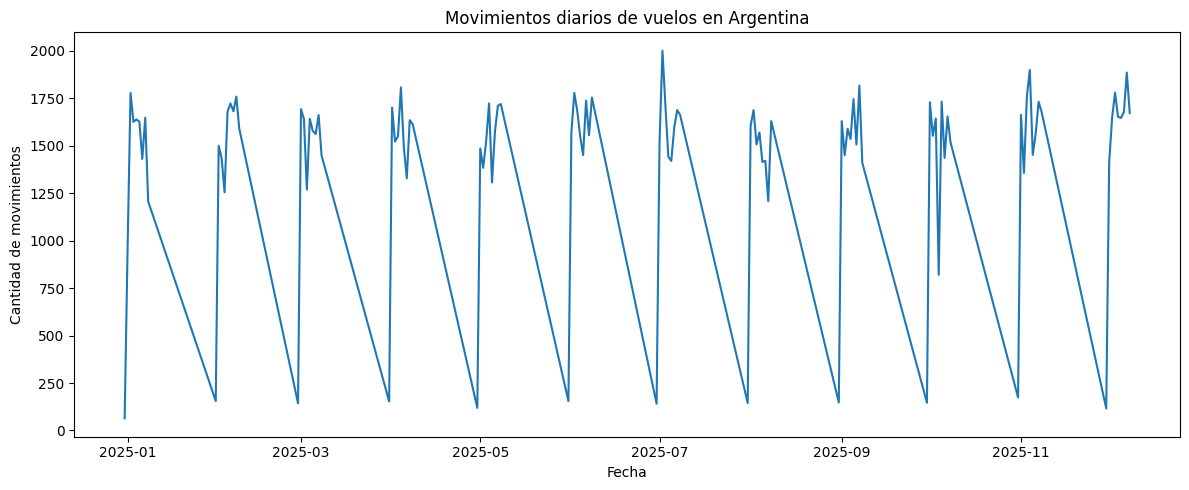

In [29]:
plt.figure(figsize=(12,5))
plt.plot(mov_dia['fecha'], mov_dia['movimientos'])
plt.title('Movimientos diarios de vuelos en Argentina')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de movimientos')
plt.tight_layout()
plt.show()


### TOP 10 AEROPUERTOS

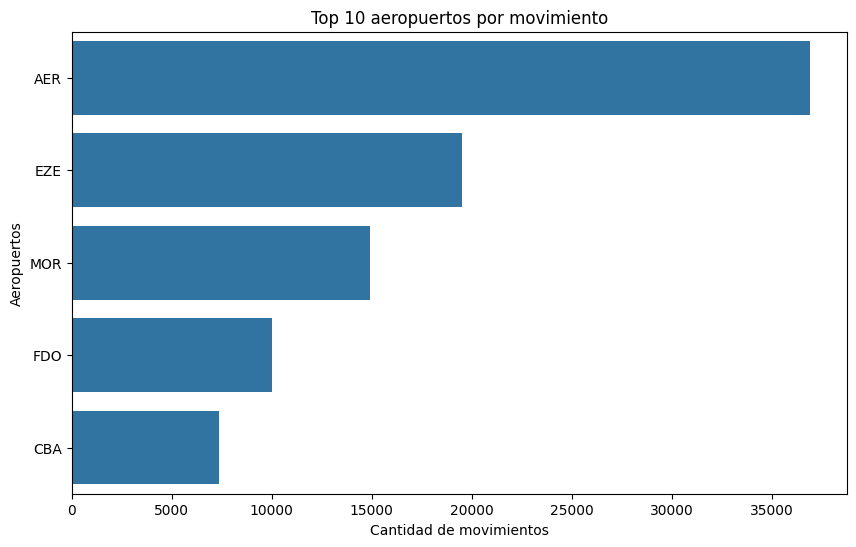

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=Top_aeropuerto.values, y=Top_aeropuerto.index)
plt.title('Top 10 aeropuertos por movimiento')
plt.xlabel('Cantidad de movimientos')
plt.ylabel('Aeropuertos')

plt.show()

## CANTIDAD DE PASAJEROS POR VUELO

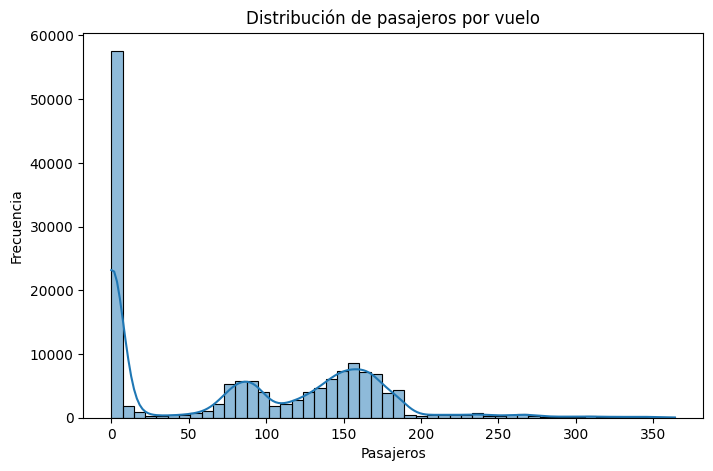

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['pasajeros'], bins=50, kde=True)
plt.title('Distribución de pasajeros por vuelo')
plt.xlabel('Pasajeros')
plt.ylabel('Frecuencia')
plt.show()


###MUCHOS VUELOS TIENEN 0 PASAJEROS

In [41]:
df.columns

Index(['fecha_utc', 'hora_utc', 'clase_de_vuelo_(todos_los_vuelos)',
       'clasificación_vuelo', 'tipo_de_movimiento', 'aeropuerto',
       'origen_/_destino', 'aerolinea_nombre', 'aeronave', 'pasajeros', 'pax',
       'calidad_dato', 'fecha_utc', 'hora_utc', 'datetime', 'datetime_local',
       'fecha'],
      dtype='object')

In [43]:
df[df['pasajeros']== 0]['clase_de_vuelo_(todos_los_vuelos)'].value_counts()

,count
clase_de_vuelo_(todos_los_vuelos),
Vuelo Escuela,20444
Vuelo Privado con Matrícula Nacional,13197
No Regular,5740
Vuelo Oficial Nacional,5344
Regular,1469
Vuelo de Adiestramiento,792
Vuelo Privado con Matrícula Extranjera,548
Trabajo Aéreo,202
Vuelo Oficial Extranjero,124


### MUCHOS SON DE ESCUELA DE VUELO

,count
tipo_de_movimiento,
Aterrizaje,24059
Despegue,23801


##MAPA DE CALOR

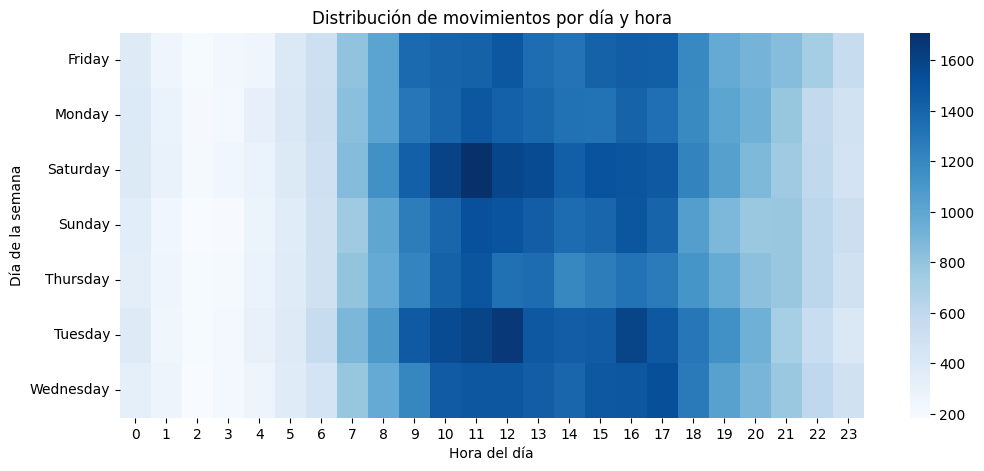

In [45]:
df['hora'] = df['datetime_local'].dt.hour
df['dia_semana'] = df['datetime_local'].dt.day_name()

pivot = df.pivot_table(index='dia_semana', columns='hora', values='tipo_de_movimiento', aggfunc='count')

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='Blues')
plt.title('Distribución de movimientos por día y hora')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.show()
